In [1]:
library(ggplot2)
library(tidyr)
library(dplyr)
library(scales)
library(stringr)
library(lubridate)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




Read both csv files, and convert the timestamp to UTC format

In [2]:
df_log1 <- read.csv(file = 'energy_troll-1_19-04.csv', sep = ',', stringsAsFactors = FALSE, header = FALSE)
df_log2 <- read.csv(file = 'energy_troll-4_19-04.csv', sep = ',', stringsAsFactors = FALSE, header = FALSE)
df_log <- bind_rows(df_log1, df_log2)

names(df_log) <- c("timestamp", "device_id", "metric_id", "value", "labels")
df_log$timestamp <- as.POSIXct(df_log$timestamp, format="%Y-%m-%dT%H:%M:%S", tz="UTC")

summary(df_log)
head(df_log)
tail(df_log)

   timestamp                    device_id          metric_id        
 Min.   :2023-04-19 16:52:00   Length:14402       Length:14402      
 1st Qu.:2023-04-19 17:22:00   Class :character   Class :character  
 Median :2023-04-19 17:52:00   Mode  :character   Mode  :character  
 Mean   :2023-04-19 17:52:00                                        
 3rd Qu.:2023-04-19 18:22:00                                        
 Max.   :2023-04-19 18:52:00                                        
     value          labels         
 Min.   :160.0   Length:14402      
 1st Qu.:199.7   Class :character  
 Median :202.8   Mode  :character  
 Mean   :211.3                     
 3rd Qu.:212.4                     
 Max.   :386.0                     

timestamp           device_id metric_id            value   
1 2023-04-19 16:52:00 troll-1   wattmetre_power_watt 165.4060
2 2023-04-19 16:52:01 troll-1   wattmetre_power_watt 166.0520
3 2023-04-19 16:52:02 troll-1   wattmetre_power_watt 163.9804
4 2023-04-19 16:52:03 troll-1   wattmetre_power_watt 166.1633
5 2023-04-19 16:52:04 troll-1   wattmetre_power_watt 164.0941
6 2023-04-19 16:52:05 troll-1   wattmetre_power_watt 164.5653
  labels                               
1 {"_device_orig":["wattmetre1-port8"]}
2 {"_device_orig":["wattmetre1-port8"]}
3 {"_device_orig":["wattmetre1-port8"]}
4 {"_device_orig":["wattmetre1-port8"]}
5 {"_device_orig":["wattmetre1-port8"]}
6 {"_device_orig":["wattmetre1-port8"]}

timestamp           device_id metric_id            value   
14397 2023-04-19 18:51:55 troll-4   wattmetre_power_watt 201.1294
14398 2023-04-19 18:51:56 troll-4   wattmetre_power_watt 230.2360
14399 2023-04-19 18:51:57 troll-4   wattmetre_power_watt 228.0347
14400 2023-04-19 18:51:58 troll-4   wattmetre_power_watt 211.7157
14401 2023-04-19 18:51:59 troll-4   wattmetre_power_watt 207.6796
14402 2023-04-19 18:52:00 troll-4   wattmetre_power_watt 245.1196
      labels                                
14397 {"_device_orig":["wattmetre1-port11"]}
14398 {"_device_orig":["wattmetre1-port11"]}
14399 {"_device_orig":["wattmetre1-port11"]}
14400 {"_device_orig":["wattmetre1-port11"]}
14401 {"_device_orig":["wattmetre1-port11"]}
14402 {"_device_orig":["wattmetre1-port11"]}

Saving 6.67 x 6.67 in image


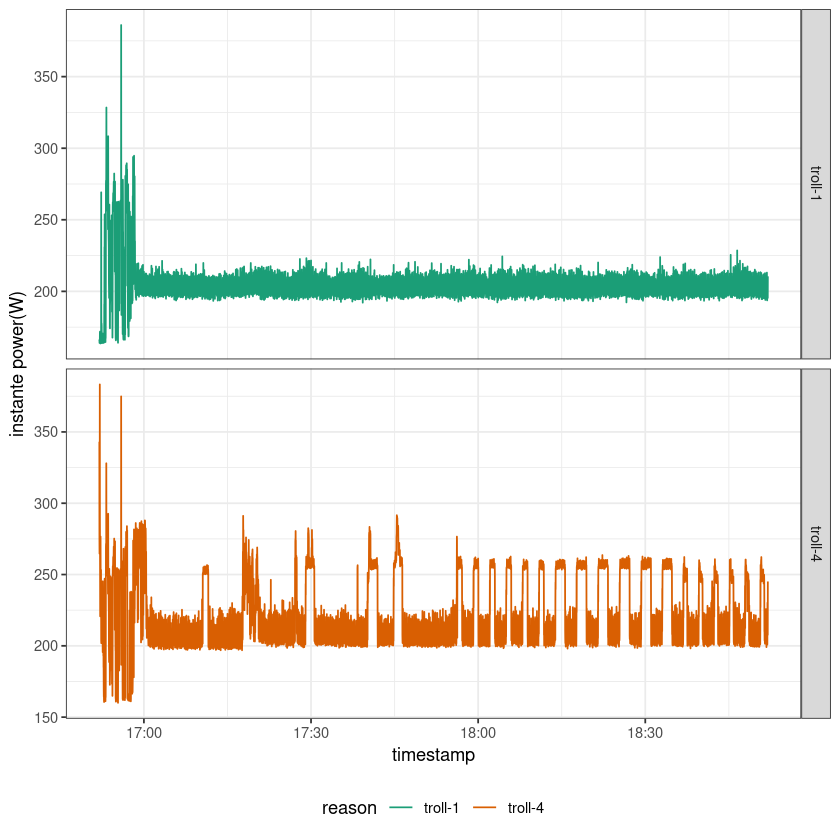

In [3]:
ggplot(data = df_log, aes(x = timestamp, y = value, color = device_id,)) + #, color = node)) +
    geom_line() +
    #geom_point(size = 0.5, position = position_dodge(width = 0.7)) +
    facet_grid(device_id ~ ., scale="free_y") +
    labs(x = "timestamp", y = "instante power(W)", color = "reason") +
    scale_color_brewer(palette = "Dark2") +
    theme_bw() +
    theme(legend.position="bottom") 
    #guides(colour=guide_legend(nrow=4,byrow=TRUE, title.position = "top"))
    ggsave('full_line_plot.png')

Read the activation logs and update the timestamp to the correct timezone

In [4]:
df_activations <- read.csv(file = 'activation.csv', sep = ',', stringsAsFactors = FALSE)
df_activations$timestamp <- as.integer(df_activations$timestamp)
df_activations$timestamp <- as_datetime(df_activations$timestamp) + hours(2)

head(df_activations)

object_uid                       object_name  function_name duration
1 cae73f2c8c6044baa73f2c8c60d4ba05 chameleon_11 chameleon_11  40.30404
2 cae73f2c8c6044baa73f2c8c60d4ba05 chameleon_11 chameleon_11        NA
3 cae73f2c8c6044baa73f2c8c60d4ba05 chameleon_11 chameleon_11        NA
4 cae73f2c8c6044baa73f2c8c60d4ba05 chameleon_11 chameleon_11        NA
5 4fb6fe21a47c42d8b6fe21a47ca2d8ca chameleon_10 chameleon_10  40.28228
6 4fb6fe21a47c42d8b6fe21a47ca2d8ca chameleon_10 chameleon_10        NA
  timestamp           reason             metadata_value metadata_description
1 <NA>                function_execution   NA                               
2 <NA>                                   2000           metadata_input      
3 2023-04-19 18:51:22 finishing_time       NA                               
4 2023-04-19 18:50:42 starting_time        NA                               
5 <NA>                function_execution   NA                               
6 <NA>                                   2000           metadata_input      
  node message
1 NA   NA     
2 NA   NA     
3 NA   NA     
4 NA   NA     
5 NA   NA     
6 NA   NA

In [5]:
df_activations_selected <- df_activations %>%
    select(
        function_name,
        duration,
        reason,
        timestamp,
        #node,
        object_uid,
        metadata_value)#,
        #metadata_description) #%>%
                                    #mutate(duration = (duration / 1000) %% 60)

# Spread the metadata_value (function input) to the same object_id functions

df_activations_selected <- df_activations_selected %>%
    group_by(object_uid) %>%
    mutate(metadata_value = max(metadata_value,na.rm = TRUE)) %>%
    filter(reason != "") %>%
    ungroup()

# Combine the function name with the function input, and split them to get function_group

df_activations_selected <- df_activations_selected %>%
    group_by(function_name, metadata_value) %>%
    mutate(function_group = strsplit(function_name, "\\_")[[1]][1]) %>%
    mutate(function_metadata = paste(strsplit(function_name, "\\_")[[1]][1],
                    metadata_value,
                    sep="_"))

head(df_activations_selected)
tail(df_activations_selected)

function_name duration reason             timestamp          
1 chameleon_11  40.30404 function_execution <NA>               
2 chameleon_11        NA finishing_time     2023-04-19 18:51:22
3 chameleon_11        NA starting_time      2023-04-19 18:50:42
4 chameleon_10  40.28228 function_execution <NA>               
5 chameleon_10        NA finishing_time     2023-04-19 18:48:37
6 chameleon_10        NA starting_time      2023-04-19 18:47:57
  object_uid                       metadata_value function_group
1 cae73f2c8c6044baa73f2c8c60d4ba05 2000           chameleon     
2 cae73f2c8c6044baa73f2c8c60d4ba05 2000           chameleon     
3 cae73f2c8c6044baa73f2c8c60d4ba05 2000           chameleon     
4 4fb6fe21a47c42d8b6fe21a47ca2d8ca 2000           chameleon     
5 4fb6fe21a47c42d8b6fe21a47ca2d8ca 2000           chameleon     
6 4fb6fe21a47c42d8b6fe21a47ca2d8ca 2000           chameleon     
  function_metadata
1 chameleon_2000   
2 chameleon_2000   
3 chameleon_2000   
4 chameleon_2000   
5 chameleon_2000   
6 chameleon_2000

function_name duration  reason             timestamp          
1 chameleon_2   14.259629 function_execution <NA>               
2 chameleon_2          NA finishing_time     2023-04-19 17:29:36
3 chameleon_2          NA starting_time      2023-04-19 17:29:21
4 chameleon_1    5.923711 function_execution <NA>               
5 chameleon_1          NA finishing_time     2023-04-19 17:27:26
6 chameleon_1          NA starting_time      2023-04-19 17:27:20
  object_uid                       metadata_value function_group
1 195711b9da5b4cdf9711b9da5b2cdf22 4000           chameleon     
2 195711b9da5b4cdf9711b9da5b2cdf22 4000           chameleon     
3 195711b9da5b4cdf9711b9da5b2cdf22 4000           chameleon     
4 43fdc80b4d774822bdc80b4d77e8222c 3500           chameleon     
5 43fdc80b4d774822bdc80b4d77e8222c 3500           chameleon     
6 43fdc80b4d774822bdc80b4d77e8222c 3500           chameleon     
  function_metadata
1 chameleon_4000   
2 chameleon_4000   
3 chameleon_4000   
4 chameleon_3500   
5 chameleon_3500   
6 chameleon_3500

In [6]:
df_activations_filtered <- df_activations_selected #%>% select(-duration) %>% na.omit()
summary(df_activations_filtered)
head(df_activations_filtered)

 function_name         duration          reason         
 Length:75          Min.   :  2.893   Length:75         
 Class :character   1st Qu.: 38.363   Class :character  
 Mode  :character   Median : 40.304   Mode  :character  
                    Mean   : 51.786                     
                    3rd Qu.: 52.750                     
                    Max.   :105.497                     
                    NA's   :50                          
   timestamp                       object_uid        metadata_value   
 Min.   :2023-04-19 17:27:20.00   Length:75          Min.   :1.0e+03  
 1st Qu.:2023-04-19 17:45:44.25   Class :character   1st Qu.:2.0e+03  
 Median :2023-04-19 18:11:22.50   Mode  :character   Median :5.0e+03  
 Mean   :2023-04-19 18:10:52.64                      Mean   :7.2e+07  
 3rd Qu.:2023-04-19 18:34:21.50                      3rd Qu.:1.0e+08  
 Max.   :2023-04-19 18:51:22.00                      Max.   :2.0e+08  
 NA's   :25                                    

function_name duration reason             timestamp          
1 chameleon_11  40.30404 function_execution <NA>               
2 chameleon_11        NA finishing_time     2023-04-19 18:51:22
3 chameleon_11        NA starting_time      2023-04-19 18:50:42
4 chameleon_10  40.28228 function_execution <NA>               
5 chameleon_10        NA finishing_time     2023-04-19 18:48:37
6 chameleon_10        NA starting_time      2023-04-19 18:47:57
  object_uid                       metadata_value function_group
1 cae73f2c8c6044baa73f2c8c60d4ba05 2000           chameleon     
2 cae73f2c8c6044baa73f2c8c60d4ba05 2000           chameleon     
3 cae73f2c8c6044baa73f2c8c60d4ba05 2000           chameleon     
4 4fb6fe21a47c42d8b6fe21a47ca2d8ca 2000           chameleon     
5 4fb6fe21a47c42d8b6fe21a47ca2d8ca 2000           chameleon     
6 4fb6fe21a47c42d8b6fe21a47ca2d8ca 2000           chameleon     
  function_metadata
1 chameleon_2000   
2 chameleon_2000   
3 chameleon_2000   
4 chameleon_2000   
5 chameleon_2000   
6 chameleon_2000

Join both datasets

In [7]:
#df_log$platform <- 'openwhisk'
#df_log$function_group <- 'openwhisk'

df_joined <- full_join(
       df_log %>% filter(device_id == 'troll-4'),
       df_activations_filtered,
       by="timestamp") #%>%

head(df_joined)
tail(df_joined)

timestamp           device_id metric_id            value   
1 2023-04-19 16:52:00 troll-4   wattmetre_power_watt 343.1260
2 2023-04-19 16:52:01 troll-4   wattmetre_power_watt 275.9540
3 2023-04-19 16:52:02 troll-4   wattmetre_power_watt 264.6588
4 2023-04-19 16:52:03 troll-4   wattmetre_power_watt 266.9020
5 2023-04-19 16:52:04 troll-4   wattmetre_power_watt 273.5510
6 2023-04-19 16:52:05 troll-4   wattmetre_power_watt 383.3082
  labels                                 function_name duration reason
1 {"_device_orig":["wattmetre1-port11"]} NA            NA       NA    
2 {"_device_orig":["wattmetre1-port11"]} NA            NA       NA    
3 {"_device_orig":["wattmetre1-port11"]} NA            NA       NA    
4 {"_device_orig":["wattmetre1-port11"]} NA            NA       NA    
5 {"_device_orig":["wattmetre1-port11"]} NA            NA       NA    
6 {"_device_orig":["wattmetre1-port11"]} NA            NA       NA    
  object_uid metadata_value function_group function_metadata
1 NA         NA             NA             NA               
2 NA         NA             NA             NA               
3 NA         NA             NA             NA               
4 NA         NA             NA             NA               
5 NA         NA             NA             NA               
6 NA         NA             NA             NA

timestamp device_id metric_id value labels function_name duration 
7221 <NA>      NA        NA        NA    NA     linpack_2     29.338094
7222 <NA>      NA        NA        NA    NA     linpack_1     26.208623
7223 <NA>      NA        NA        NA    NA     chameleon_4    2.915482
7224 <NA>      NA        NA        NA    NA     chameleon_3    2.892871
7225 <NA>      NA        NA        NA    NA     chameleon_2   14.259629
7226 <NA>      NA        NA        NA    NA     chameleon_1    5.923711
     reason             object_uid                       metadata_value
7221 function_execution 7e253d3a088c4823a53d3a088c38237a 5000          
7222 function_execution 96ea35e1d5cd40f9aa35e1d5cd90f956 5000          
7223 function_execution 9841bc3a9f35401e81bc3a9f35301e89 1000          
7224 function_execution c6effd3271414821affd327141182123 1000          
7225 function_execution 195711b9da5b4cdf9711b9da5b2cdf22 4000          
7226 function_execution 43fdc80b4d774822bdc80b4d77e8222c 3500          
     function_group function_metadata
7221 linpack        linpack_5000     
7222 linpack        linpack_5000     
7223 chameleon      chameleon_1000   
7224 chameleon      chameleon_1000   
7225 chameleon      chameleon_4000   
7226 chameleon      chameleon_3500

In [8]:
# Attribute openwhisk and platfoms as function and group name for the df_log datasets

df_all <- df_joined %>%
    mutate(function_name = ifelse(is.na(function_name), 'openwhisk', function_name)) %>%
    #mutate(function_metadata = ifelse(is.na(function_group), 'platform', function_group)) %>%
    mutate(function_group = ifelse(is.na(function_group), 'platform', function_group))

head(df_all)
tail(df_all)

timestamp           device_id metric_id            value   
1 2023-04-19 16:52:00 troll-4   wattmetre_power_watt 343.1260
2 2023-04-19 16:52:01 troll-4   wattmetre_power_watt 275.9540
3 2023-04-19 16:52:02 troll-4   wattmetre_power_watt 264.6588
4 2023-04-19 16:52:03 troll-4   wattmetre_power_watt 266.9020
5 2023-04-19 16:52:04 troll-4   wattmetre_power_watt 273.5510
6 2023-04-19 16:52:05 troll-4   wattmetre_power_watt 383.3082
  labels                                 function_name duration reason
1 {"_device_orig":["wattmetre1-port11"]} openwhisk     NA       NA    
2 {"_device_orig":["wattmetre1-port11"]} openwhisk     NA       NA    
3 {"_device_orig":["wattmetre1-port11"]} openwhisk     NA       NA    
4 {"_device_orig":["wattmetre1-port11"]} openwhisk     NA       NA    
5 {"_device_orig":["wattmetre1-port11"]} openwhisk     NA       NA    
6 {"_device_orig":["wattmetre1-port11"]} openwhisk     NA       NA    
  object_uid metadata_value function_group function_metadata
1 NA         NA             platform       NA               
2 NA         NA             platform       NA               
3 NA         NA             platform       NA               
4 NA         NA             platform       NA               
5 NA         NA             platform       NA               
6 NA         NA             platform       NA

timestamp device_id metric_id value labels function_name duration 
7221 <NA>      NA        NA        NA    NA     linpack_2     29.338094
7222 <NA>      NA        NA        NA    NA     linpack_1     26.208623
7223 <NA>      NA        NA        NA    NA     chameleon_4    2.915482
7224 <NA>      NA        NA        NA    NA     chameleon_3    2.892871
7225 <NA>      NA        NA        NA    NA     chameleon_2   14.259629
7226 <NA>      NA        NA        NA    NA     chameleon_1    5.923711
     reason             object_uid                       metadata_value
7221 function_execution 7e253d3a088c4823a53d3a088c38237a 5000          
7222 function_execution 96ea35e1d5cd40f9aa35e1d5cd90f956 5000          
7223 function_execution 9841bc3a9f35401e81bc3a9f35301e89 1000          
7224 function_execution c6effd3271414821affd327141182123 1000          
7225 function_execution 195711b9da5b4cdf9711b9da5b2cdf22 4000          
7226 function_execution 43fdc80b4d774822bdc80b4d77e8222c 3500          
     function_group function_metadata
7221 linpack        linpack_5000     
7222 linpack        linpack_5000     
7223 chameleon      chameleon_1000   
7224 chameleon      chameleon_1000   
7225 chameleon      chameleon_4000   
7226 chameleon      chameleon_3500

Warning message:
“Removed 25 rows containing missing values (`geom_vline()`).”
Saving 6.67 x 6.67 in image
Warning message:
“Removed 25 rows containing missing values (`geom_vline()`).”


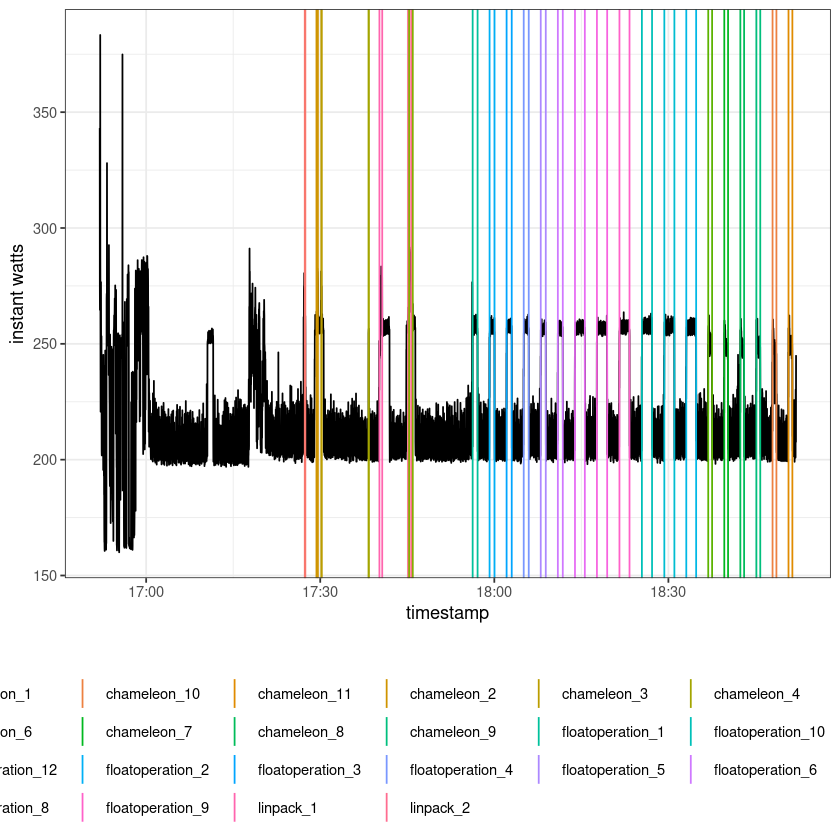

In [9]:
ggplot() +
    geom_line(data=df_log %>% filter(device_id == 'troll-4'), 
              aes(x = timestamp, y = value)) + #, color = node)) +) +
    #geom_line(data=df_all %>% filter(device_id == 'troll-4'), aes(x = timestamp, y = value, color = function_name)) + #, color = node)) +
    geom_vline(data=df_all %>% filter(function_name != 'openwhisk'), 
               aes(xintercept = timestamp, color = function_name)) + #, color = node)) +
    #facet_grid(device_id ~ ., scale="free_y") +
    labs(x = "timestamp", y = "instant watts", color = "Function") +
    #scale_color_brewer(palette = "Dark2") +
    theme_bw() +
    theme(legend.position="bottom")  + 
    guides(colour=guide_legend(nrow=4,byrow=TRUE, title.position = "top"))
    ggsave('energy.png')

Warning message:
“Removed 25 rows containing missing values (`geom_point()`).”
Saving 6.67 x 6.67 in image
Warning message:
“Removed 25 rows containing missing values (`geom_point()`).”


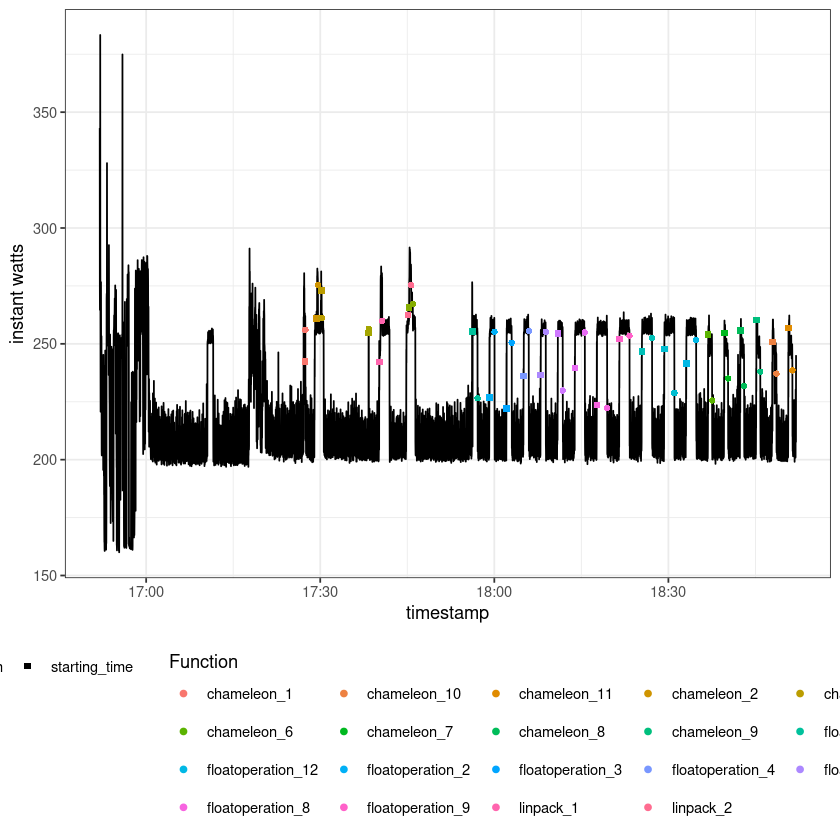

In [10]:
ggplot() +
    geom_line(data=df_log %>% filter(device_id == 'troll-4'), aes(x = timestamp, y = value)) + #, color = node)) +) +
    geom_point(data=df_all %>% filter(function_name != 'openwhisk'), 
               aes(x = timestamp, y = value, color = function_name, shape=reason)) + #, color = node)) +
    #geom_vline(data=df_all %>% filter(device_id == 'troll-4'), aes(xintercept = timestamp, color = function_name)) + #, color = node)) +
    #facet_grid(device_id ~ ., scale="free_y") +
    labs(x = "timestamp", y = "instant watts", color = "Function") +
    #scale_color_brewer(palette = "Dark2") +
    theme_bw() +
    theme(legend.position="bottom")  + 
    guides(colour=guide_legend(nrow=4,byrow=TRUE, title.position = "top"))
    ggsave('energy2.png')

Saving 6.67 x 6.67 in image


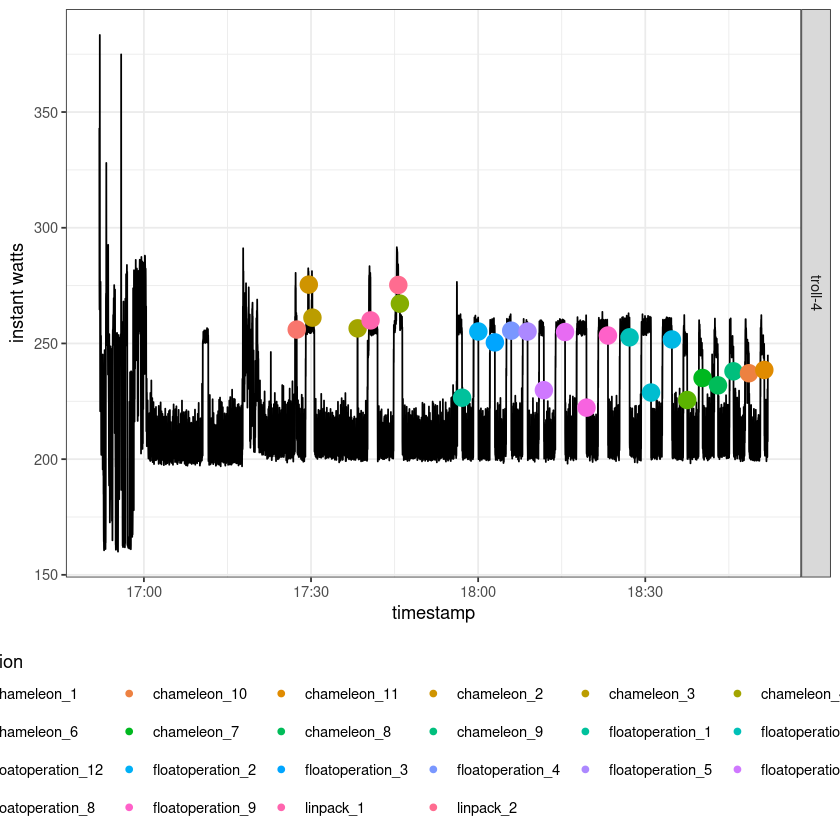

In [11]:
ggplot() +
    geom_line(data=df_log %>% filter(device_id == 'troll-4'), aes(x = timestamp, y = value)) + #, color = node)) +) +
    geom_point(data=df_all %>% filter(device_id == 'troll-4', reason == "finishing_time"), 
               aes(x = timestamp, y = value, color = function_name, size = 1)) + #, color = node)) +
    facet_grid(device_id ~ ., scale="free_y") +
    labs(x = "timestamp", y = "instant watts", color = "Function") +
    #scale_color_brewer(palette = "Dark2") +
    theme_bw() +
    theme(legend.position="bottom")  + 
    guides(colour=guide_legend(nrow=4,byrow=TRUE, title.position = "top"))
    ggsave('energy_f.png')

# Getting the duration, and energy consumption

In [12]:
head(df_all %>% filter(function_name != 'openwhisk'))
tail(df_all %>% filter(function_name != 'openwhisk'))

timestamp           device_id metric_id            value   
1 2023-04-19 17:27:20 troll-4   wattmetre_power_watt 242.3880
2 2023-04-19 17:27:26 troll-4   wattmetre_power_watt 256.0041
3 2023-04-19 17:29:21 troll-4   wattmetre_power_watt 261.0367
4 2023-04-19 17:29:36 troll-4   wattmetre_power_watt 275.4216
5 2023-04-19 17:30:12 troll-4   wattmetre_power_watt 273.0000
6 2023-04-19 17:30:15 troll-4   wattmetre_power_watt 261.1510
  labels                                 function_name duration reason        
1 {"_device_orig":["wattmetre1-port11"]} chameleon_1   NA       starting_time 
2 {"_device_orig":["wattmetre1-port11"]} chameleon_1   NA       finishing_time
3 {"_device_orig":["wattmetre1-port11"]} chameleon_2   NA       starting_time 
4 {"_device_orig":["wattmetre1-port11"]} chameleon_2   NA       finishing_time
5 {"_device_orig":["wattmetre1-port11"]} chameleon_3   NA       starting_time 
6 {"_device_orig":["wattmetre1-port11"]} chameleon_3   NA       finishing_time
  object_uid                       metadata_value function_group
1 43fdc80b4d774822bdc80b4d77e8222c 3500           chameleon     
2 43fdc80b4d774822bdc80b4d77e8222c 3500           chameleon     
3 195711b9da5b4cdf9711b9da5b2cdf22 4000           chameleon     
4 195711b9da5b4cdf9711b9da5b2cdf22 4000           chameleon     
5 c6effd3271414821affd327141182123 1000           chameleon     
6 c6effd3271414821affd327141182123 1000           chameleon     
  function_metadata
1 chameleon_3500   
2 chameleon_3500   
3 chameleon_4000   
4 chameleon_4000   
5 chameleon_1000   
6 chameleon_1000

timestamp device_id metric_id value labels function_name duration 
70 <NA>      NA        NA        NA    NA     linpack_2     29.338094
71 <NA>      NA        NA        NA    NA     linpack_1     26.208623
72 <NA>      NA        NA        NA    NA     chameleon_4    2.915482
73 <NA>      NA        NA        NA    NA     chameleon_3    2.892871
74 <NA>      NA        NA        NA    NA     chameleon_2   14.259629
75 <NA>      NA        NA        NA    NA     chameleon_1    5.923711
   reason             object_uid                       metadata_value
70 function_execution 7e253d3a088c4823a53d3a088c38237a 5000          
71 function_execution 96ea35e1d5cd40f9aa35e1d5cd90f956 5000          
72 function_execution 9841bc3a9f35401e81bc3a9f35301e89 1000          
73 function_execution c6effd3271414821affd327141182123 1000          
74 function_execution 195711b9da5b4cdf9711b9da5b2cdf22 4000          
75 function_execution 43fdc80b4d774822bdc80b4d77e8222c 3500          
   function_group function_metadata
70 linpack        linpack_5000     
71 linpack        linpack_5000     
72 chameleon      chameleon_1000   
73 chameleon      chameleon_1000   
74 chameleon      chameleon_4000   
75 chameleon      chameleon_3500

In [13]:
df_duration_mutate <- df_all %>%
    filter(function_name != 'openwhisk') %>%
    group_by(function_metadata) %>%
    summarise(duration = max(duration, na.rm = TRUE) / 3600, # To convert seconds in hours
              sum_watt = sum(value, na.rm = TRUE)) %>% 
    distinct() %>%
    ungroup()

head(df_duration_mutate)
tail(df_duration_mutate)

df_duration <- df_duration_mutate %>%
    group_by(function_metadata) %>%
    mutate(energy_consumed = (sum_watt * duration) / 1000) # To have Joules = kWh

head(df_duration)
tail(df_duration)

#head(df_duration)
#tail(df_duration)

function_metadata        duration     sum_watt 
1 chameleon_1000           0.0008098562 1045.2870
2 chameleon_2000           0.0111955657 3471.2760
3 chameleon_3500           0.0016454752  498.3921
4 chameleon_4000           0.0039610081  536.4583
5 floatoperation_100000000 0.0146526666 2904.0245
6 floatoperation_200000000 0.0293047469 2915.1576

function_metadata        duration    sum_watt 
1 chameleon_2000           0.011195566 3471.2760
2 chameleon_3500           0.001645475  498.3921
3 chameleon_4000           0.003961008  536.4583
4 floatoperation_100000000 0.014652667 2904.0245
5 floatoperation_200000000 0.029304747 2915.1576
6 linpack_5000             0.008149470 1039.9051

function_metadata        duration     sum_watt  energy_consumed
1 chameleon_1000           0.0008098562 1045.2870 0.0008465321   
2 chameleon_2000           0.0111955657 3471.2760 0.0388628989   
3 chameleon_3500           0.0016454752  498.3921 0.0008200918   
4 chameleon_4000           0.0039610081  536.4583 0.0021249157   
5 floatoperation_100000000 0.0146526666 2904.0245 0.0425517024   
6 floatoperation_200000000 0.0293047469 2915.1576 0.0854279542

function_metadata        duration    sum_watt  energy_consumed
1 chameleon_2000           0.011195566 3471.2760 0.0388628989   
2 chameleon_3500           0.001645475  498.3921 0.0008200918   
3 chameleon_4000           0.003961008  536.4583 0.0021249157   
4 floatoperation_100000000 0.014652667 2904.0245 0.0425517024   
5 floatoperation_200000000 0.029304747 2915.1576 0.0854279542   
6 linpack_5000             0.008149470 1039.9051 0.0084746755

In [ ]:
df_duration <- df_duration_mutate %>%
    group_by(function_metadata) %>%
    mutate(energy_consumed = (sum_watt * duration) / 1000) # To have Joules = kWh

# Sample power values (replace with your actual data)
power_values <- c(10, 15, 20, 18, 12) 

# Compute time interval (replace with your actual time interval if not 1 second)
time_interval <- 1

# Create a data frame with power values and their corresponding time index
df <- data.frame(time_index = 1:length(power_values), power = power_values)

# Calculate the energy consumption using the trapezoidal rule
total_energy <- df %>%
  mutate(x1 = lag(time_index), x2 = time_index,
         y1 = lag(power), y2 = power) %>%
  mutate(area = (y1 + y2) * (x2 - x1) / 2 * time_interval) %>%
  summarise(total_energy = sum(area))

# Print the total energy consumption
print(total_energy)


In [14]:
df_duration %>% filter(function_metadata == 'chameleon_1000')

function_metadata duration     sum_watt energy_consumed
1 chameleon_1000    0.0008098562 1045.287 0.0008465321

Saving 6.67 x 6.67 in image


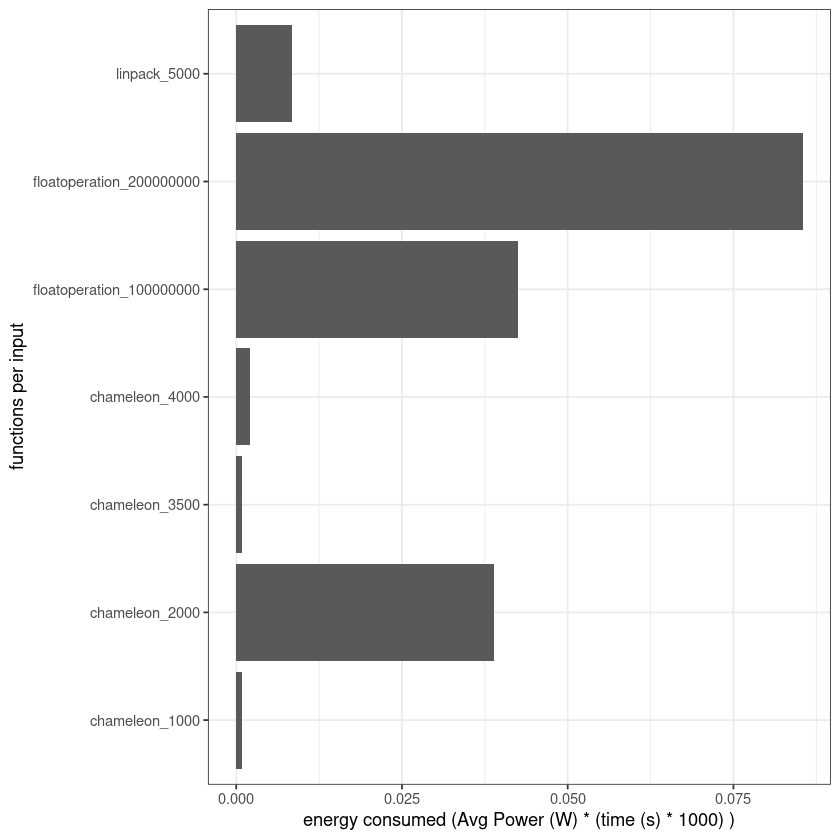

In [15]:
ggplot() +
    geom_bar(data=df_duration,stat="identity", 
              aes(x = energy_consumed , y = function_metadata)) +
    labs(x = "energy consumed (Avg Power (W) * (time (s) * 1000) )", y = "functions per input", color = "Function") +
    scale_fill_brewer(palette = "Dark2") +
    theme_bw() +
    theme(legend.position="bottom")  + 
    guides(colour=guide_legend(nrow=3,byrow=TRUE, title.position = "top"))
    ggsave('energy_bar.png')

In [16]:
df_duration_mutate <- df_all %>%
    filter(function_name != 'openwhisk') %>%
    group_by(function_name) %>%
    mutate(duration = max(duration, na.rm = TRUE) / 3600,
           sum_watt = sum(value, na.rm = TRUE)) %>% 
    distinct() 

head(df_duration_mutate)
tail(df_duration_mutate)

df_duration <- df_duration_mutate %>%
    group_by(function_name) %>%
    mutate(energy_consumed = sum_watt * (duration / 1000))

head(df_duration)
tail(df_duration)

#head(df_duration)
#tail(df_duration)

timestamp           device_id metric_id            value   
1 2023-04-19 17:27:20 troll-4   wattmetre_power_watt 242.3880
2 2023-04-19 17:27:26 troll-4   wattmetre_power_watt 256.0041
3 2023-04-19 17:29:21 troll-4   wattmetre_power_watt 261.0367
4 2023-04-19 17:29:36 troll-4   wattmetre_power_watt 275.4216
5 2023-04-19 17:30:12 troll-4   wattmetre_power_watt 273.0000
6 2023-04-19 17:30:15 troll-4   wattmetre_power_watt 261.1510
  labels                                 function_name duration    
1 {"_device_orig":["wattmetre1-port11"]} chameleon_1   0.0016454752
2 {"_device_orig":["wattmetre1-port11"]} chameleon_1   0.0016454752
3 {"_device_orig":["wattmetre1-port11"]} chameleon_2   0.0039610081
4 {"_device_orig":["wattmetre1-port11"]} chameleon_2   0.0039610081
5 {"_device_orig":["wattmetre1-port11"]} chameleon_3   0.0008035754
6 {"_device_orig":["wattmetre1-port11"]} chameleon_3   0.0008035754
  reason         object_uid                       metadata_value function_group
1 starting_time  43fdc80b4d774822bdc80b4d77e8222c 3500           chameleon     
2 finishing_time 43fdc80b4d774822bdc80b4d77e8222c 3500           chameleon     
3 starting_time  195711b9da5b4cdf9711b9da5b2cdf22 4000           chameleon     
4 finishing_time 195711b9da5b4cdf9711b9da5b2cdf22 4000           chameleon     
5 starting_time  c6effd3271414821affd327141182123 1000           chameleon     
6 finishing_time c6effd3271414821affd327141182123 1000           chameleon     
  function_metadata sum_watt
1 chameleon_3500    498.3921
2 chameleon_3500    498.3921
3 chameleon_4000    536.4583
4 chameleon_4000    536.4583
5 chameleon_1000    534.1510
6 chameleon_1000    534.1510

timestamp device_id metric_id value labels function_name duration    
1 <NA>      NA        NA        NA    NA     linpack_2     0.0081494704
2 <NA>      NA        NA        NA    NA     linpack_1     0.0072801732
3 <NA>      NA        NA        NA    NA     chameleon_4   0.0008098562
4 <NA>      NA        NA        NA    NA     chameleon_3   0.0008035754
5 <NA>      NA        NA        NA    NA     chameleon_2   0.0039610081
6 <NA>      NA        NA        NA    NA     chameleon_1   0.0016454752
  reason             object_uid                       metadata_value
1 function_execution 7e253d3a088c4823a53d3a088c38237a 5000          
2 function_execution 96ea35e1d5cd40f9aa35e1d5cd90f956 5000          
3 function_execution 9841bc3a9f35401e81bc3a9f35301e89 1000          
4 function_execution c6effd3271414821affd327141182123 1000          
5 function_execution 195711b9da5b4cdf9711b9da5b2cdf22 4000          
6 function_execution 43fdc80b4d774822bdc80b4d77e8222c 3500          
  function_group function_metadata sum_watt
1 linpack        linpack_5000      537.7320
2 linpack        linpack_5000      502.1731
3 chameleon      chameleon_1000    511.1360
4 chameleon      chameleon_1000    534.1510
5 chameleon      chameleon_4000    536.4583
6 chameleon      chameleon_3500    498.3921

timestamp           device_id metric_id            value   
1 2023-04-19 17:27:20 troll-4   wattmetre_power_watt 242.3880
2 2023-04-19 17:27:26 troll-4   wattmetre_power_watt 256.0041
3 2023-04-19 17:29:21 troll-4   wattmetre_power_watt 261.0367
4 2023-04-19 17:29:36 troll-4   wattmetre_power_watt 275.4216
5 2023-04-19 17:30:12 troll-4   wattmetre_power_watt 273.0000
6 2023-04-19 17:30:15 troll-4   wattmetre_power_watt 261.1510
  labels                                 function_name duration    
1 {"_device_orig":["wattmetre1-port11"]} chameleon_1   0.0016454752
2 {"_device_orig":["wattmetre1-port11"]} chameleon_1   0.0016454752
3 {"_device_orig":["wattmetre1-port11"]} chameleon_2   0.0039610081
4 {"_device_orig":["wattmetre1-port11"]} chameleon_2   0.0039610081
5 {"_device_orig":["wattmetre1-port11"]} chameleon_3   0.0008035754
6 {"_device_orig":["wattmetre1-port11"]} chameleon_3   0.0008035754
  reason         object_uid                       metadata_value function_group
1 starting_time  43fdc80b4d774822bdc80b4d77e8222c 3500           chameleon     
2 finishing_time 43fdc80b4d774822bdc80b4d77e8222c 3500           chameleon     
3 starting_time  195711b9da5b4cdf9711b9da5b2cdf22 4000           chameleon     
4 finishing_time 195711b9da5b4cdf9711b9da5b2cdf22 4000           chameleon     
5 starting_time  c6effd3271414821affd327141182123 1000           chameleon     
6 finishing_time c6effd3271414821affd327141182123 1000           chameleon     
  function_metadata sum_watt energy_consumed
1 chameleon_3500    498.3921 0.0008200918   
2 chameleon_3500    498.3921 0.0008200918   
3 chameleon_4000    536.4583 0.0021249157   
4 chameleon_4000    536.4583 0.0021249157   
5 chameleon_1000    534.1510 0.0004292306   
6 chameleon_1000    534.1510 0.0004292306

timestamp device_id metric_id value labels function_name duration    
1 <NA>      NA        NA        NA    NA     linpack_2     0.0081494704
2 <NA>      NA        NA        NA    NA     linpack_1     0.0072801732
3 <NA>      NA        NA        NA    NA     chameleon_4   0.0008098562
4 <NA>      NA        NA        NA    NA     chameleon_3   0.0008035754
5 <NA>      NA        NA        NA    NA     chameleon_2   0.0039610081
6 <NA>      NA        NA        NA    NA     chameleon_1   0.0016454752
  reason             object_uid                       metadata_value
1 function_execution 7e253d3a088c4823a53d3a088c38237a 5000          
2 function_execution 96ea35e1d5cd40f9aa35e1d5cd90f956 5000          
3 function_execution 9841bc3a9f35401e81bc3a9f35301e89 1000          
4 function_execution c6effd3271414821affd327141182123 1000          
5 function_execution 195711b9da5b4cdf9711b9da5b2cdf22 4000          
6 function_execution 43fdc80b4d774822bdc80b4d77e8222c 3500          
  function_group function_metadata sum_watt energy_consumed
1 linpack        linpack_5000      537.7320 0.0043822310   
2 linpack        linpack_5000      502.1731 0.0036559068   
3 chameleon      chameleon_1000    511.1360 0.0004139467   
4 chameleon      chameleon_1000    534.1510 0.0004292306   
5 chameleon      chameleon_4000    536.4583 0.0021249157   
6 chameleon      chameleon_3500    498.3921 0.0008200918

In [17]:
df_duration %>% filter(function_metadata == 'chameleon_1000')

timestamp           device_id metric_id            value  
1 2023-04-19 17:30:12 troll-4   wattmetre_power_watt 273.000
2 2023-04-19 17:30:15 troll-4   wattmetre_power_watt 261.151
3 2023-04-19 17:38:20 troll-4   wattmetre_power_watt 254.614
4 2023-04-19 17:38:22 troll-4   wattmetre_power_watt 256.522
5 <NA>                NA        NA                        NA
6 <NA>                NA        NA                        NA
  labels                                 function_name duration    
1 {"_device_orig":["wattmetre1-port11"]} chameleon_3   0.0008035754
2 {"_device_orig":["wattmetre1-port11"]} chameleon_3   0.0008035754
3 {"_device_orig":["wattmetre1-port11"]} chameleon_4   0.0008098562
4 {"_device_orig":["wattmetre1-port11"]} chameleon_4   0.0008098562
5 NA                                     chameleon_4   0.0008098562
6 NA                                     chameleon_3   0.0008035754
  reason             object_uid                       metadata_value
1 starting_time      c6effd3271414821affd327141182123 1000          
2 finishing_time     c6effd3271414821affd327141182123 1000          
3 starting_time      9841bc3a9f35401e81bc3a9f35301e89 1000          
4 finishing_time     9841bc3a9f35401e81bc3a9f35301e89 1000          
5 function_execution 9841bc3a9f35401e81bc3a9f35301e89 1000          
6 function_execution c6effd3271414821affd327141182123 1000          
  function_group function_metadata sum_watt energy_consumed
1 chameleon      chameleon_1000    534.151  0.0004292306   
2 chameleon      chameleon_1000    534.151  0.0004292306   
3 chameleon      chameleon_1000    511.136  0.0004139467   
4 chameleon      chameleon_1000    511.136  0.0004139467   
5 chameleon      chameleon_1000    511.136  0.0004139467   
6 chameleon      chameleon_1000    534.151  0.0004292306

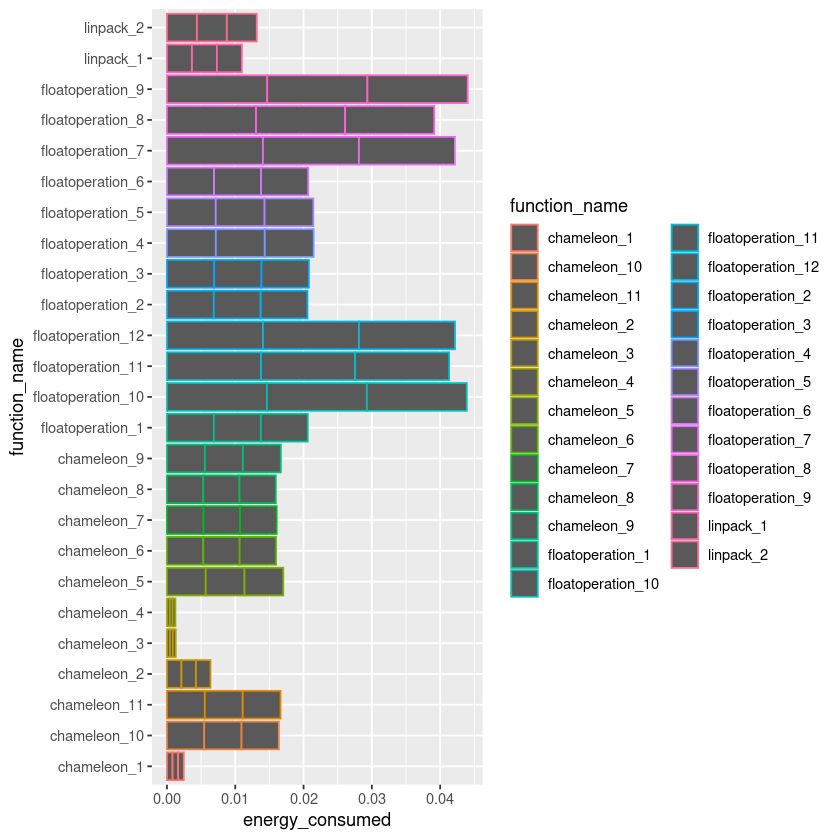

In [18]:
ggplot(data=df_duration, 
    aes(x = energy_consumed , y = function_name, color = function_name)) +
    geom_bar(stat="identity")